<a href="https://colab.research.google.com/github/NguyenQuangHuy2001/AI_CNN/blob/main/CNN_Cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Khai báo thư viện

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from keras.datasets import cifar100
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randint
from google.colab.patches import cv2_imshow
from keras.layers.core import Dense,Activation,Dropout,Flatten

Load dữ liệu

In [ ]:
#load data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 6s 0us/step


Xử lý dữ liệu

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

x_test_original = x_test;
y_test_original = y_test;
x_train = x_train/255.0
x_test = x_test/255.0
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

Tạo model

In [ ]:

# Create Model(CNN + Dropout)
model = Sequential()
#BLOCK 1
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#BLOCK 2
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#BLOCK 3
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                      

In [ ]:
'''
model =Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3))),
model.add(MaxPool2D(2, 2)),
model.add(Conv2D(64, (3, 3), activation='relu')),
model.add(MaxPool2D(2, 2)),
model.add(Flatten()),
model.add(Dense(512, activation='relu')),
model.add(Dense(100, activation='softmax'))
model.summary()
'''

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [ ]:
'''
sai 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()
'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Training model

In [ ]:

#optimizer = SGD(lr = 0.01, momentum=0.9)
optimizer = 'Adam'
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=150, batch_size=256,validation_data=(x_test,y_test),verbose=1)


Epoch 1/150
196/196 [==============================] - 11s 50ms/step - loss: 1.0225 - accuracy: 0.6875 - val_loss: 2.2122 - val_accuracy: 0.4746
Epoch 2/150
196/196 [==============================] - 9s 48ms/step - loss: 1.0027 - accuracy: 0.6930 - val_loss: 2.2240 - val_accuracy: 0.4720
Epoch 3/150
196/196 [==============================] - 9s 47ms/step - loss: 0.9850 - accuracy: 0.6993 - val_loss: 2.2300 - val_accuracy: 0.4744
Epoch 4/150
196/196 [==============================] - 9s 48ms/step - loss: 0.9718 - accuracy: 0.7040 - val_loss: 2.2746 - val_accuracy: 0.4677
Epoch 5/150
196/196 [==============================] - 10s 50ms/step - loss: 0.9659 - accuracy: 0.7050 - val_loss: 2.2566 - val_accuracy: 0.4680
Epoch 6/150
196/196 [==============================] - 10s 52ms/step - loss: 0.9538 - accuracy: 0.7093 - val_loss: 2.2559 - val_accuracy: 0.4746
Epoch 7/150
196/196 [==============================] - 9s 47ms/step - loss: 0.9549 - accuracy: 0.7061 - val_loss: 2.2362 - val_accura

Lưu model

In [ ]:
model.save('CNN_Cifar100.h5')

Đánh giá độ chính xác

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la:',score[0])
print('do chinh xac kiem tra:',score[1])
y_pred = model.predict(x_test)
print(y_pred.flatten())
print(y_test)

sai so kiem tra la: 2.5828793048858643
do chinh xac kiem tra: 0.47920000553131104
[3.5224212e-11 3.8375876e-07 9.4208721e-05 ... 3.2319095e-11 2.4359434e-10
 7.5219012e-11]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Vẽ đồ thị đọ chính xác

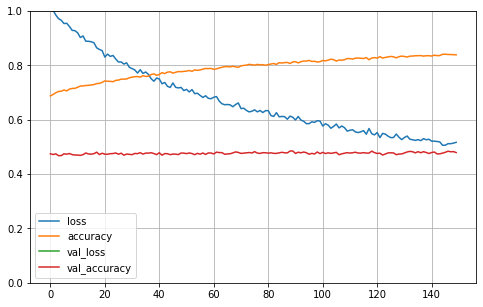

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


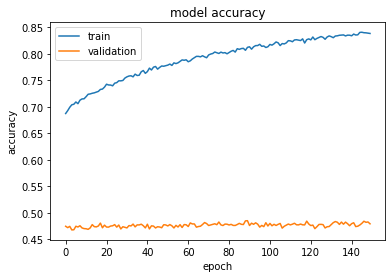

In [ ]:
# Graphs of accuracy
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

array([58])

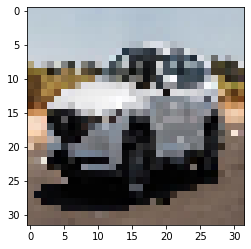

In [ ]:
# tải ảnh con chó lên rùi nhận dạng
from keras.saving.save import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

model= load_model('CNN_Cifar100.h5')
img = load_img('xehoi.jpg', target_size= (32,32))
plt.imshow(img)
img = img_to_array(img)

img=img.reshape(1,32,32,3)
img = img.astype('float32')
img= img/255
np.argmax(model.predict(img),axis=1)


